# Benchmarking

This notebook analyses the performance of Simple Colocalisation and other plugins against manual counts.

## About the data

Manual counts were collected by each member of the team.

In [68]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [161]:
df = pd.read_csv("cell_counts.csv", skiprows=2, header=0)
df["Image Set"] = df["Image Set"].fillna(method='ffill').str.replace(".lif", "").astype(int)
df.set_index(keys=["Image Set", "Series"], inplace=True)

df.fillna(0, inplace=True)

display(df)


Count  Time (m)  Count.1  Time  Count.2  Time.1  Count.3  \
Image Set Series                                                             
22        1        1332        15      897    12     1122      12     1131   
          2         851        10      580     5      859      12      870   
          3        1003         9      606     6     1115      13     1010   
33        1         831         8      596     5      715       9      633   
          2         632         5      613     6      746      10      817   
          3         598         7      515     6      502       7      333   
49        1         823         8      825     9      792       9      930   
          2         662        11      631     7      671       8      716   
          3         935         8      948     8     1079      12     1107   

                  Time.2  Count.4  Time.3  Count.5  Time.4  Time mean (m)  \
Image Set Series                                                            
22        1            9     1281      15    857.0    20.0             14   
          2            5      868       6    725.0    12.0              8   
          3            6     1162      10   1092.0    16.0             10   
33        1            4      829      10    771.0    11.0              8   
          2            6      854       7    771.0    11.0              8   
          3            4      631       6      0.0     0.0              6   
49        1            5      883       9      0.0     0.0              8   
          2            5      643       6      0.0     0.0              7   
          3            6     1047      12      0.0     0.0              9   

                  Count mean  Count range   ITCN  ITCN % Error     SC  \
Image Set Series                                                        
22        1             1103          475  840.0     23.867069  996.0   
          2              792          290    0.0      0.000000    0.0   
          3              998          556    0.0      0.000000    0.0   
33        1              729          235    0.0      0.000000    0.0   
          2              739          241    0.0      0.000000    0.0   
          3              516          298    0.0      0.000000    0.0   
49        1              851          138    0.0      0.000000    0.0   
          2              665           85    0.0      0.000000    0.0   
          3             1023          172    0.0      0.000000    0.0   

                  SC % Error  
Image Set Series              
22        1         9.728097  
          2         0.000000  
          3         0.000000  
33        1         0.000000  
          2         0.000000  
          3         0.000000  
49        1         0.000000  
          2         0.000000  
          3         0.000000

In [165]:
def counts():
    return df[["Count", "Count.1", "Count.2", "Count.3", "Count.4", "Count.5"]]
    

                  Count  Count.1  Count.2  Count.3  Count.4  Count.5
Image Set Series                                                    
22        1        1332      897     1122     1131     1281    857.0
          2         851      580      859      870      868    725.0
          3        1003      606     1115     1010     1162   1092.0
33        1         831      596      715      633      829    771.0
          2         632      613      746      817      854    771.0
          3         598      515      502      333      631      0.0
49        1         823      825      792      930      883      0.0
          2         662      631      671      716      643      0.0
          3         935      948     1079     1107     1047      0.0


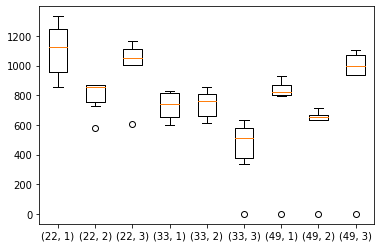

In [166]:
print(counts())
plt.boxplot(counts(), labels=df.index)
plt.show()